# Ensemble Learning in Python
Ensemble learning techniques attempt to make the performance of the predictive models better by improving their accuracy. Ensemble Learning is a process using which multiple machine learning models (such as classifiers) are strategically constructed to solve a particular problem.
#### Model error and reducing this error with Ensembles:
The error emerging from any machine model can be broken down into three components mathematically. Following are these component:
**Bias + Variance + Irreducible error**
Bias error is useful to quantify how much on an average are the predicted values different from the actual value. A high bias error means we have an under-performing model which keeps on missing essential trends.

Variance on the other side quantifies how are the prediction made on the same observation different from each other. A high variance model will over-fit on your training population and perform poorly on any observation beyond training.Typically, as you increase the complexity of your model, you will see a reduction in error due to lower bias in the model. However, this only happens until a particular point. As you continue to make your model more complex, you end up over-fitting your model, and hence your model will start suffering from the high variance.

### Different types of Ensemble learning methods:
#### Bagging based Ensemble learning:
Bagging is one of the Ensemble construction techniques which is also known as Bootstrap Aggregation. Bootstrap establishes the foundation of Bagging technique.
#### Boosting-based Ensemble learning:
Models that are typically used in Boosting technique are XGBoost (Extreme Gradient Boosting), GBM (Gradient Boosting Machine), ADABoost (Adaptive Boosting), etc.
#### Voting based Ensemble learning:
Stacked aggregation is a technique which can be used to learn how to weigh these predictions in the best possible way.

# Simple Ensemble Techniques

    Max Voting
    Averaging
    Weighted Averaging
1. **Max Voting** -The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

Sample Code:
    
    model1 = tree.DecisionTreeClassifier()
    model2 = KNeighborsClassifier()
    model3= LogisticRegression()

    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model3.fit(x_train,y_train)

    pred1=model1.predict(x_test)
    pred2=model2.predict(x_test)
    pred3=model3.predict(x_test)

    final_pred = np.array([])
    for i in range(0,len(x_test)):
        final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))
Alternatively, you can use “VotingClassifier” module in sklearn as follows:
    
    from sklearn.ensemble import VotingClassifier
    model1 = LogisticRegression(random_state=1)
    model2 = tree.DecisionTreeClassifier(random_state=1)
    model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
    model.fit(x_train,y_train)
    model.score(x_test,y_test)
2. **Averaging**- Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

Sample Code:

    model1 = tree.DecisionTreeClassifier()
    model2 = KNeighborsClassifier()
    model3= LogisticRegression()

    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model3.fit(x_train,y_train)

    pred1=model1.predict_proba(x_test)
    pred2=model2.predict_proba(x_test)
    pred3=model3.predict_proba(x_test)

    finalpred=(pred1+pred2+pred3)/3
3. **Weighted Average**-This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. 

Sample Code:

    model1 = tree.DecisionTreeClassifier()
    model2 = KNeighborsClassifier()
    model3= LogisticRegression()

    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model3.fit(x_train,y_train)

    pred1=model1.predict_proba(x_test)
    pred2=model2.predict_proba(x_test)
    pred3=model3.predict_proba(x_test)

    finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
## Advanced Ensemble techniques

1. **Stacking**- Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.
    1. The train set is split into 10 parts.
        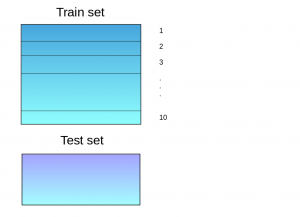
    2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
        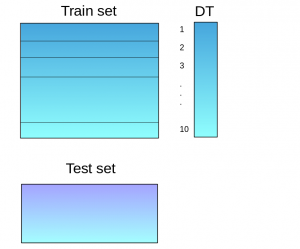
    3. The base model (in this case, decision tree) is then fitted on the whole train dataset.
    4. Using this model, predictions are made on the test set.
        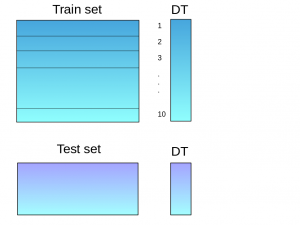
    5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.
        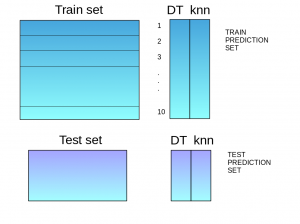
    6. The predictions from the train set are used as features to build a new model.
        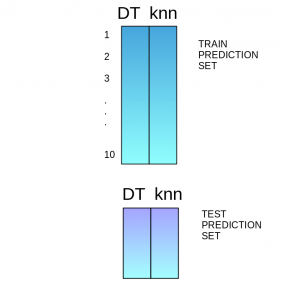
    7. This model is used to make final predictions on the test prediction set.
    
Sample code:
    
    def Stacking(model,train,y,test,n_fold):
       folds=StratifiedKFold(n_splits=n_fold,random_state=1)
       test_pred=np.empty((test.shape[0],1),float)
       train_pred=np.empty((0,1),float)
       for train_indices,val_indices in folds.split(train,y.values):
          x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
          y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

          model.fit(X=x_train,y=y_train)
          train_pred=np.append(train_pred,model.predict(x_val))
          test_pred=np.append(test_pred,model.predict(test))
        return test_pred.reshape(-1,1),train_pred
Now we’ll create two base models – decision tree and knn.
    
    model1 = tree.DecisionTreeClassifier(random_state=1)

    test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

    train_pred1=pd.DataFrame(train_pred1)
    test_pred1=pd.DataFrame(test_pred1)

    model2 = KNeighborsClassifier()

    test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

    train_pred2=pd.DataFrame(train_pred2)
    test_pred2=pd.DataFrame(test_pred2)
    
Create a third model, logistic regression, on the predictions of the decision tree and knn models.
    
    df = pd.concat([train_pred1, train_pred2], axis=1)
    df_test = pd.concat([test_pred1, test_pred2], axis=1)

    model = LogisticRegression(random_state=1)
    model.fit(df,y_train)
    model.score(df_test, y_test)
In order to simplify the above explanation, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. 

2. **Blending**- Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. 
    1. The train set is split into training and validation sets.
    2. Model(s) are fitted on the training set.
    3. The predictions are made on the validation set and the test set.
    4. The validation set and its predictions are used as features to build a new model.
    5. This model is used to make final predictions on the test and meta-features.
        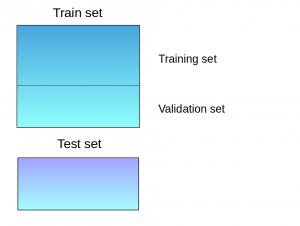
        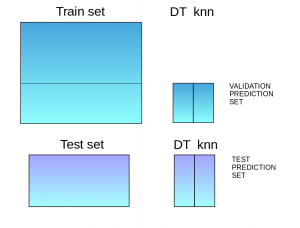
Sample Code:

    model1 = tree.DecisionTreeClassifier()
    model1.fit(x_train, y_train)
    val_pred1=model1.predict(x_val)
    test_pred1=model1.predict(x_test)
    val_pred1=pd.DataFrame(val_pred1)
    test_pred1=pd.DataFrame(test_pred1)

    model2 = KNeighborsClassifier()
    model2.fit(x_train,y_train)
    val_pred2=model2.predict(x_val)
    test_pred2=model2.predict(x_test)
    val_pred2=pd.DataFrame(val_pred2)
    test_pred2=pd.DataFrame(test_pred2)
Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.
    
    df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
    df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

    model = LogisticRegression()
    model.fit(df_val,y_val)
    model.score(df_test,y_test)
3. **Bagging**-The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set. 
    1. Multiple subsets are created from the original dataset, selecting observations with replacement.
    2. A base model (weak model) is created on each of these subsets.
    3. The models run in parallel and are independent of each other.
    4. The final predictions are determined by combining the predictions from all the models.
        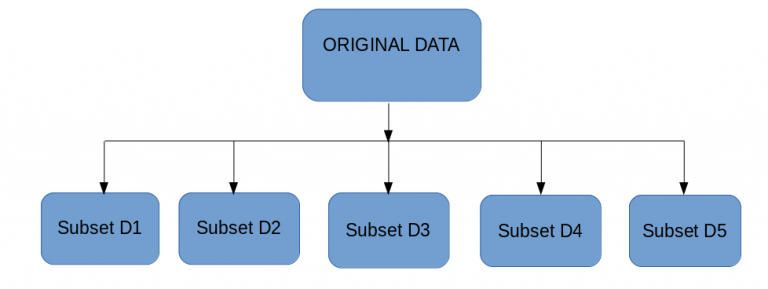
        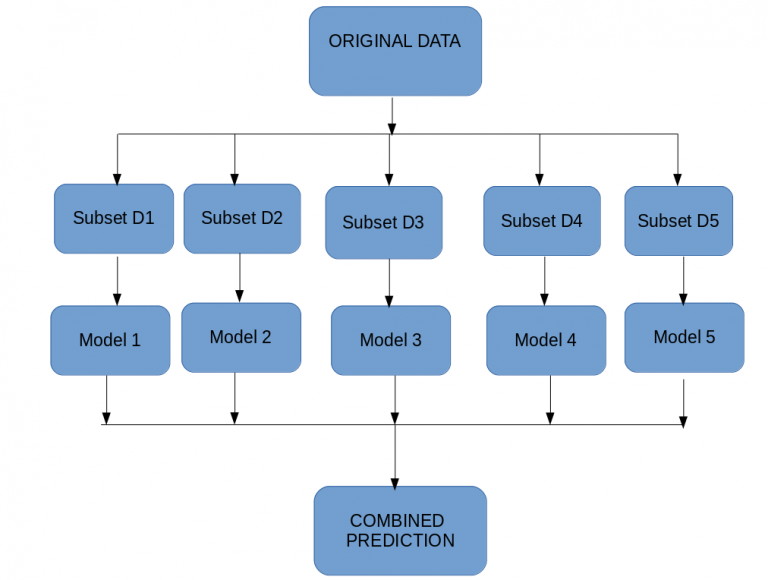
4. **Boosting**- Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.
    1. A subset is created from the original dataset.
    2. Initially, all data points are given equal weights.
    3. A base model is created on this subset.
    4. This model is used to make predictions on the whole dataset.
    5. Errors are calculated using the actual values and predicted values.
    6. The observations which are incorrectly predicted, are given higher weights.
        (Here, the three misclassified blue-plus points will be given higher weights)
    7. Another model is created and predictions are made on the dataset.
        (This model tries to correct the errors from the previous model)
    8. Similarly, multiple models are created, each correcting the errors of the previous model.
    9. The final model (strong learner) is the weighted mean of all the models (weak learners).
    
        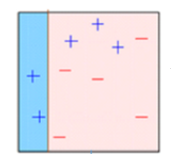
        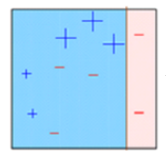
        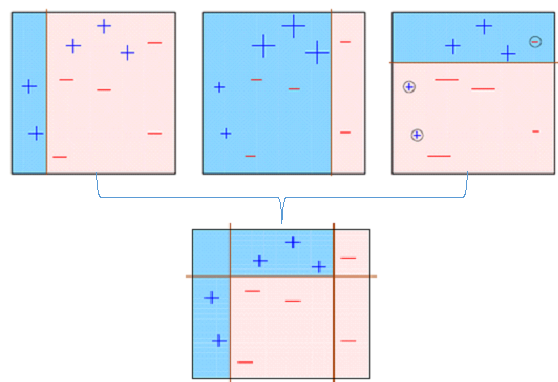
        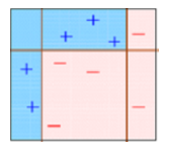
Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

## Algorithms based on Bagging and Boosting

**Bagging algorithms:**
    
   1. Bagging meta-estimator
   2. Random forest
**Boosting algorithms:**
   1. AdaBoost
   2. GBM
   3. XGBM
   4. Light GBM
   5. CatBoost 
   
### Bagging

### 1. Bagging meta-estimator
Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions.

Following are the steps for the bagging meta-estimator algorithm:

    1. Random subsets are created from the original dataset (Bootstrapping).
    2. The subset of the dataset includes all features.
    3. A user-specified base estimator is fitted on each of these smaller sets.
    4. Predictions from each model are combined to get the final result.
CODE:

    from sklearn.ensemble import BaggingClassifier
    from sklearn import tree
    model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
Sample code for regression problem:
    
    from sklearn.ensemble import BaggingRegressor
    model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
**Parameters used in the  algorithms:**

    **base_estimator:**
    It defines the base estimator to fit on random subsets of the dataset.
    When nothing is specified, the base estimator is a decision tree.
    **n_estimators:**
    It is the number of base estimators to be created.
    The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.
    **max_samples:**
    This parameter controls the size of the subsets.
    It is the maximum number of samples to train each base estimator.
    **max_features:**
    Controls the number of features to draw from the whole dataset.
    It defines the maximum number of features required to train each base estimator.
    **n_jobs:**
    The number of jobs to run in parallel.
    Set this value equal to the cores in your system.
    If -1, the number of jobs is set to the number of cores.
    **random_state:**
    It specifies the method of random split. When random state value is same for two models, the random selection is same for both models.
    This parameter is useful when you want to compare different models.
### 2.Random Forest
It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

    1. Random subsets are created from the original dataset (bootstrapping).
    2. At each node in the decision tree, only a random set of features are considered to decide the best split.
    3. A decision tree model is fitted on each of the subsets.
    4. The final prediction is calculated by averaging the predictions from all decision trees.

        model = RandomForestClassifier()

     **fit the model with the training data**
    model.fit(train_x,train_y)

    **number of trees used**
    print('Number of Trees used : ', model.n_estimators)

     **predict the target on the train dataset**
    predict_train = model.predict(train_x)
    print('\nTarget on train data',predict_train) 

     **Accuray Score on train dataset**
    accuracy_train = accuracy_score(train_y,predict_train)
    print('\naccuracy_score on train dataset : ', accuracy_train)

     **predict the target on the test dataset**
    predict_test = model.predict(test_x)
    print('\nTarget on test data',predict_test) 

     **Accuracy Score on test dataset**
    accuracy_test = accuracy_score(test_y,predict_test)
    print('\naccuracy_score on test dataset : ', accuracy_test)

#### Parameters

    **n_estimators:**
    It defines the number of decision trees to be created in a random forest.
    Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
    **criterion:**
    It defines the function that is to be used for splitting.
    The function measures the quality of a split for each feature and chooses the best split.
    **max_features :**
    It defines the maximum number of features allowed for the split in each decision tree.
    Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
    **max_depth:**
    Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
    **min_samples_split:**
    Used to define the minimum number of samples required in a leaf node before a split is attempted.
    If the number of samples is less than the required number, the node is not split.
    **min_samples_leaf:**
    This defines the minimum number of samples required to be at a leaf node.
    Smaller leaf size makes the model more prone to capturing noise in train data.
    **max_leaf_nodes:**
    This parameter specifies the maximum number of leaf nodes for each tree.
    The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
    **n_jobs:**
    This indicates the number of jobs to run in parallel.
    Set value to -1 if you want it to run on all cores in the system.
    **random_state:**
    This parameter is used to define the random selection.
    It is used for comparison between various models.
### 3.AdaBoost
Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

    1. Initially, all observations in the dataset are given equal weights.
    2. A model is built on a subset of data.
    3. Using this model, predictions are made on the whole dataset.
    4. Errors are calculated by comparing the predictions and actual values.
    5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
    6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
    7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.
CODE:

    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier(random_state=1)
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
Sample code for regression problem:    

    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    
#### Parameters
    **base_estimators:**
    It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
    **n_estimators:**
    It defines the number of base estimators.
    The default value is 10, but you should keep a higher value to get better performance.
    **learning_rate:**
    This parameter controls the contribution of the estimators in the final combination.
    There is a trade-off between learning_rate and n_estimators.
    **max_depth:**
    Defines the maximum depth of the individual estimator.
    Tune this parameter for best performance.
    **n_jobs:**
    Specifies the number of processors it is allowed to use.
    Set value to -1 for maximum processors allowed.
    **random_state :**
    An integer value to specify the random data split.
    A definite value of random_state will always produce same results if given with same parameters and training data.
### 4.Gradient Boosting (GBM)
Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

We will use a simple example to understand the GBM algorithm. We have to predict the age of a group of people using the below data:
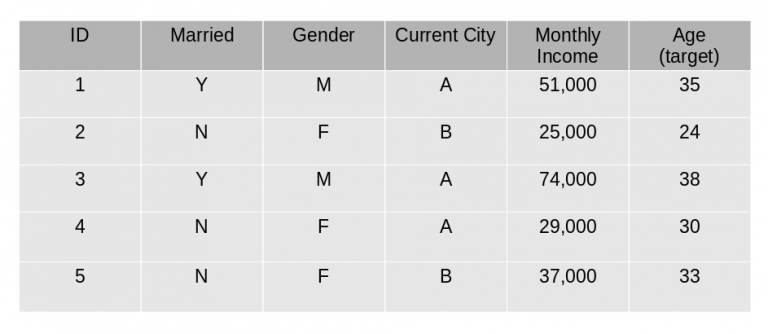
1. The mean age is assumed to be the predicted value for all observations in the dataset.
2. The errors are calculated using this mean prediction and actual values of age.
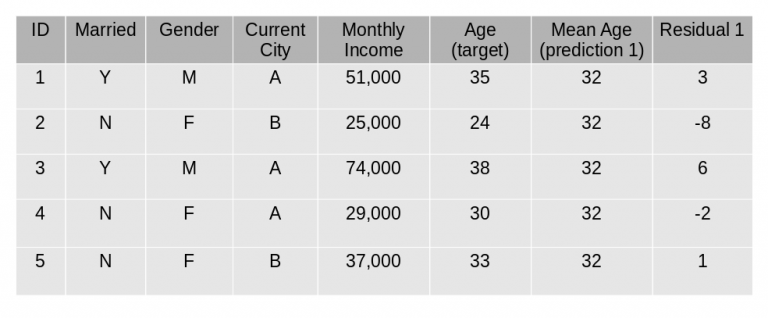
3. A tree model is created using the errors calculated above as target variable. Our objective is to find the best split to minimize the error.
4. The predictions by this model are combined with the predictions 1.
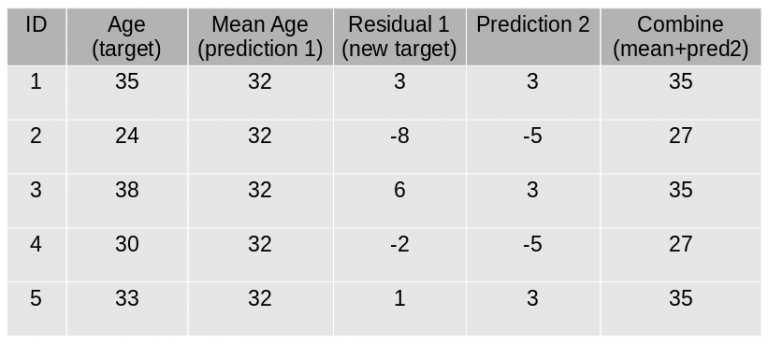
5. This value calculated above is the new prediction.
6. New errors are calculated using this predicted value and actual value.
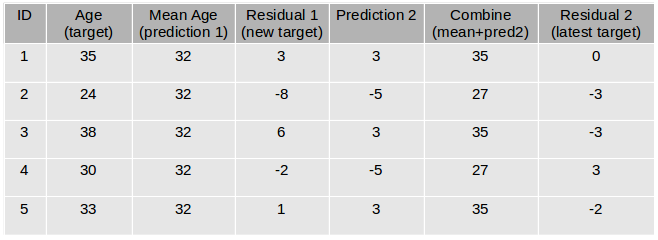
7. Steps 2 to 6 are repeated till the maximum number of iterations is reached (or error function does not change).

CODE:

    from sklearn.ensemble import GradientBoostingClassifier
    model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
Sample code for regression problem:
    
    from sklearn.ensemble import GradientBoostingRegressor
    model= GradientBoostingRegressor()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    
#### Parameters
    **min_samples_split**
    Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
    Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    **min_samples_leaf**
    Defines the minimum samples required in a terminal or leaf node.
    Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.
    **min_weight_fraction_leaf**
    Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
    max_depth
    **The maximum depth of a tree.**
    Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
    Should be tuned using CV.
    **max_leaf_nodes**
    The maximum number of terminal nodes or leaves in a tree.
    Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    If this is defined, GBM will ignore max_depth.
    **max_features**
    The number of features to consider while searching for the best split. These will be randomly selected.
    As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total 
    **number of features.**
    Higher values can lead to over-fitting but it generally depends on a case to case scenario.
    
### 5.XGBoost
XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

XGBoost is comparatively better than other techniques:

    1. Regularization:
    Standard GBM implementation has no regularisation like XGBoost.
    Thus XGBoost also helps to reduce overfitting.
    2. Parallel Processing:
    XGBoost implements parallel processing and is faster than GBM .
    XGBoost also supports implementation on Hadoop.
    3. High Flexibility:
    XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
    4. Handling Missing Values:
    XGBoost has an in-built routine to handle missing values.
    5. Tree Pruning:
    XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
    6. Built-in Cross-Validation:
    XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
XGBoost takes care of the missing values itself, you do not have to impute the missing values.

CODE:

    import xgboost as xgb
    model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
Sample code for regression problem:
   
    import xgboost as xgb
    model=xgb.XGBRegressor()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    
#### Parameters

    **nthread**
    This is used for parallel processing and the number of cores in the system should be entered..
    If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.
    **eta**
    Analogous to learning rate in GBM.
    Makes the model more robust by shrinking the weights on each step.
    **min_child_weight**
    Defines the minimum sum of weights of all observations required in a child.
    Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    **max_depth**
    It is used to define the maximum depth.
    Higher depth will allow the model to learn relations very specific to a particular sample.
    **max_leaf_nodes**
    The maximum number of terminal nodes or leaves in a tree.
    Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    If this is defined, GBM will ignore max_depth.
    **gamma**
    A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
    Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    **subsample**
    Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
    Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.
    **colsample_bytree**
    It is similar to max_features in GBM.
    Denotes the fraction of columns to be randomly sampled for each tree.
    
### 6.Light GBM
Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. 
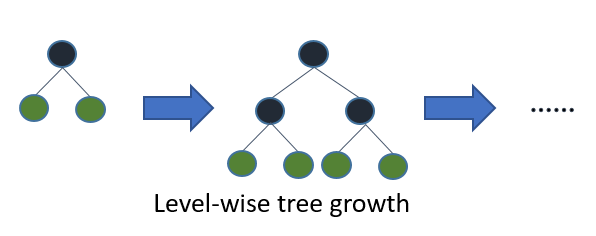
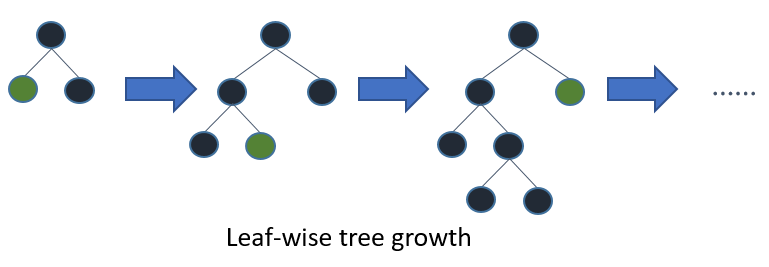
Leaf-wise growth may cause over-fitting on smaller datasets but that can be avoided by using the ‘max_depth’ parameter for learning. 

CODE:

    import lightgbm as lgb
    train_data=lgb.Dataset(x_train,label=y_train)
    #define parameters
    params = {'learning_rate':0.001}
    model= lgb.train(params, train_data, 100) 
    y_pred=model.predict(x_test)
    for i in range(0,185):
       if y_pred[i]>=0.5: 
       y_pred[i]=1
    else: 
       y_pred[i]=0
       
Sample code for regression problem:

    import lightgbm as lgb
    train_data=lgb.Dataset(x_train,label=y_train)
    params = {'learning_rate':0.001}
    model= lgb.train(params, train_data, 100)
    from sklearn.metrics import mean_squared_error
    rmse=mean_squared_error(y_pred,y_test)**0.5
    
#### Parameters

    **num_iterations:**
    It defines the number of boosting iterations to be performed.
    **num_leaves :**
    This parameter is used to set the number of leaves to be formed in a tree.
    In case of Light GBM, since splitting takes place leaf-wise rather than depth-wise, num_leaves must be smaller than 2^(max_depth), otherwise, it may lead to overfitting.
    **min_data_in_leaf :**
    A very small value may cause overfitting.
    It is also one of the most important parameters in dealing with overfitting.
    **max_depth:**
    It specifies the maximum depth or level up to which a tree can grow.
    A very high value for this parameter can cause overfitting.
    **bagging_fraction:**
    It is used to specify the fraction of data to be used for each iteration.
    This parameter is generally used to speed up the training.
    **max_bin :**
    Defines the max number of bins that feature values will be bucketed in.
    A smaller value of max_bin can save a lot of time as it buckets the feature values in discrete bins which is computationally inexpensive.
    
### 7.CatBoost
Handling categorical variables is a tedious process, especially when you have a large number of such variables. When your categorical variables have too many labels (i.e. they are highly cardinal), performing one-hot-encoding on them exponentially increases the dimensionality and it becomes really difficult to work with the dataset.

CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms.

CatBoost algorithm effectively deals with categorical variables. Thus, you should not perform one-hot encoding for categorical variables. Just load the files, impute missing values, and you’re good to go.

CODE:

    from catboost import CatBoostClassifier
    model=CatBoostClassifier()
    categorical_features_indices = np.where(df.dtypes != np.float)[0]
    model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
    model.score(x_test,y_test)
Sample code for regression problem:

    from catboost import CatBoostRegressor
    model=CatBoostRegressor()
    categorical_features_indices = np.where(df.dtypes != np.float)[0]
    model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
    model.score(x_test,y_test)

#### Parameters

    **loss_function:**
    Defines the metric to be used for training.
    **iterations:**
    The maximum number of trees that can be built.
    The final number of trees may be less than or equal to this number.
    **learning_rate:**
    Defines the learning rate.
    Used for reducing the gradient step.
    **border_count:**
    It specifies the number of splits for numerical features.
    It is similar to the max_bin parameter.
    **depth:**
    Defines the depth of the trees.
    **random_seed:**
    This parameter is similar to the ‘random_state’ parameter we have seen previously.
    It is an integer value to define the random seed for training.
    
Source: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
        https://www.datacamp.com/community/tutorials/ensemble-learning-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

In [3]:
df = pd.read_csv('../Dataset_Folder/mushrooms.csv')

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## The Data

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Goal

**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

# EDA

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='class', ylabel='count'>

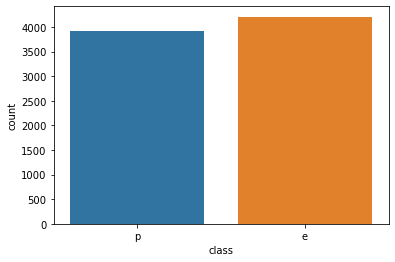

In [7]:
sns.countplot(data=df,x='class')

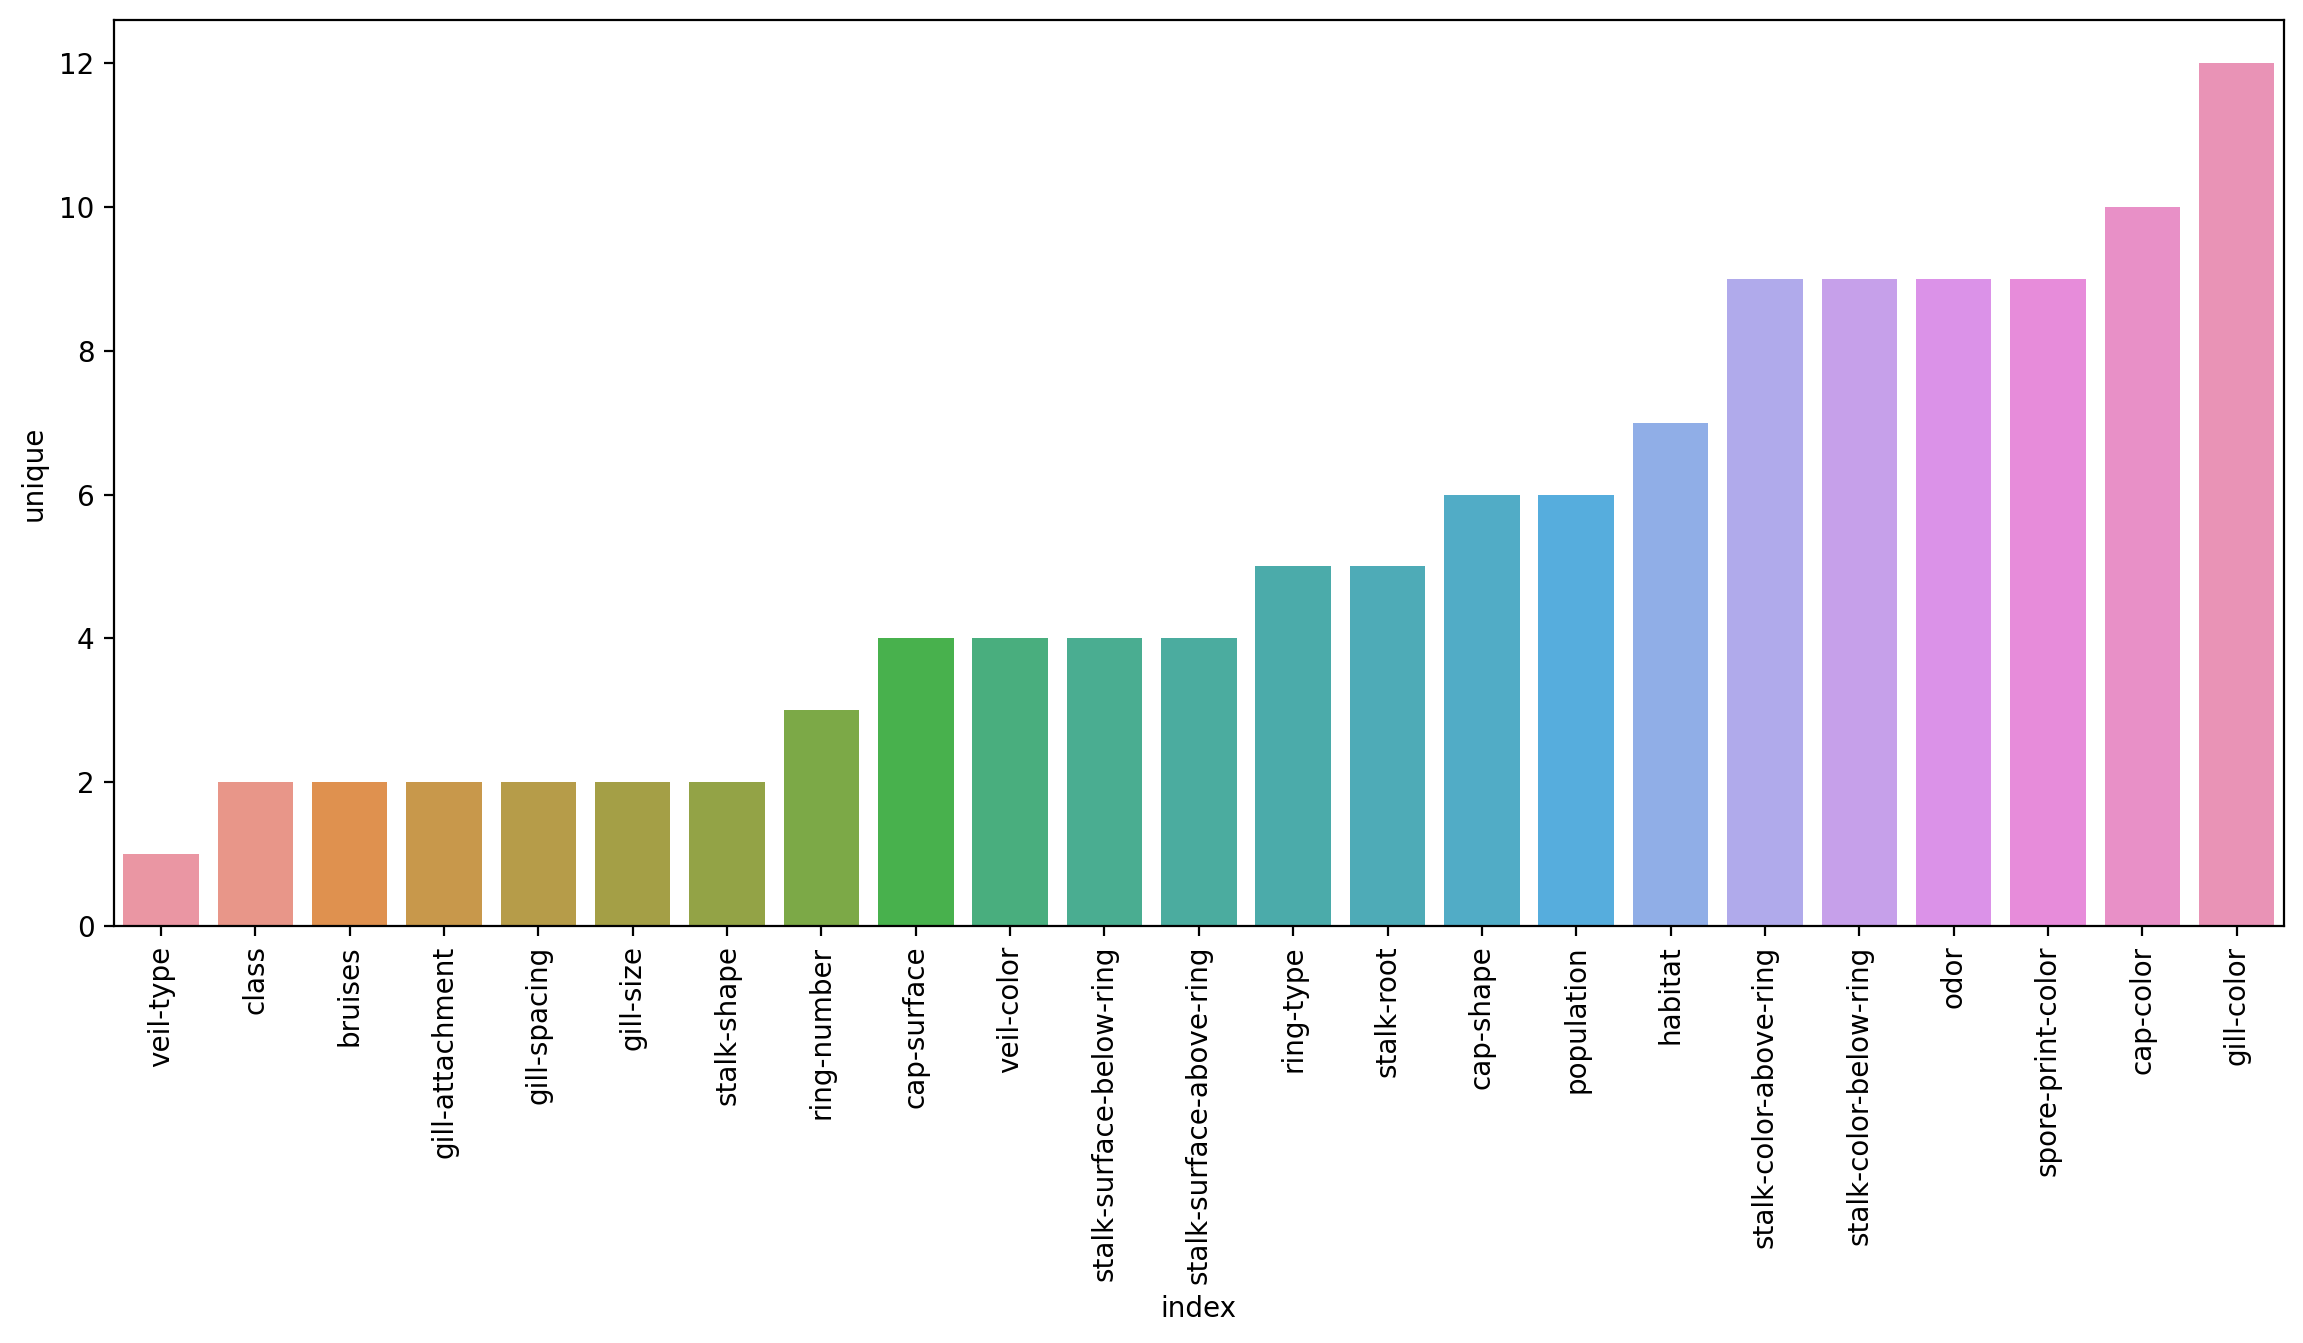

In [8]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [9]:
X= df.drop('class',axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [10]:
X = pd.get_dummies(X,drop_first=True)

In [11]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
y= df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Modeling : AdaBoost

In [14]:
model1= AdaBoostClassifier(n_estimators=1)

In [15]:
model1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [16]:
y_pred1= model1.predict(X_test)

In [17]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1274
           p       0.81      0.96      0.88      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



In [18]:
model1.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [19]:
feature=pd.DataFrame(index=X.columns, data=model1.feature_importances_,columns=['Feature Importance'])

In [20]:
feature

,Feature Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [21]:
feature=feature[feature['Feature Importance']>0.00005]
feature

,Feature Importance
odor_n,1.0


In [22]:
model1.feature_importances_.argmax()

22

In [23]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

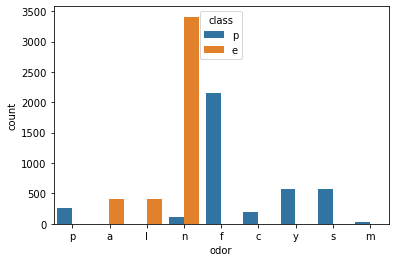

In [24]:
sns.countplot(data=df,x='odor',hue='class')

# Analyzing performance as more weak learners are added.

In [25]:
len(X.columns)

95

In [26]:
error=[]
for n in range(1,96):
    model1= AdaBoostClassifier(n_estimators=n)
    model1.fit(X_train,y_train)
    y_pred1=model1.predict(X_test)
    err= 1-accuracy_score(y_test,y_pred1)
    
    
    error.append(err)

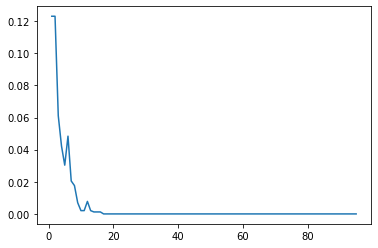

In [27]:
plt.plot(range(1,96),error)

In [28]:
model1.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [29]:
model1

AdaBoostClassifier(n_estimators=95)

In [30]:
model1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.02105263, 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.04210526, 0.03157895, 0.03157895,
       0.        , 0.        , 0.05263158, 0.02105263, 0.        ,
       0.        , 0.        , 0.11578947, 0.08421053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.04210526, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [31]:
feature=pd.DataFrame(index=X.columns, data=model1.feature_importances_,columns=['Feature Importance'])

In [32]:
feature=feature[feature['Feature Importance']>0]
feature

,Feature Importance
cap-surface_g,0.010526
cap-color_c,0.010526
cap-color_n,0.021053
cap-color_w,0.021053
bruises_t,0.042105
odor_c,0.031579
odor_f,0.031579
odor_n,0.052632
odor_p,0.021053
gill-spacing_w,0.115789


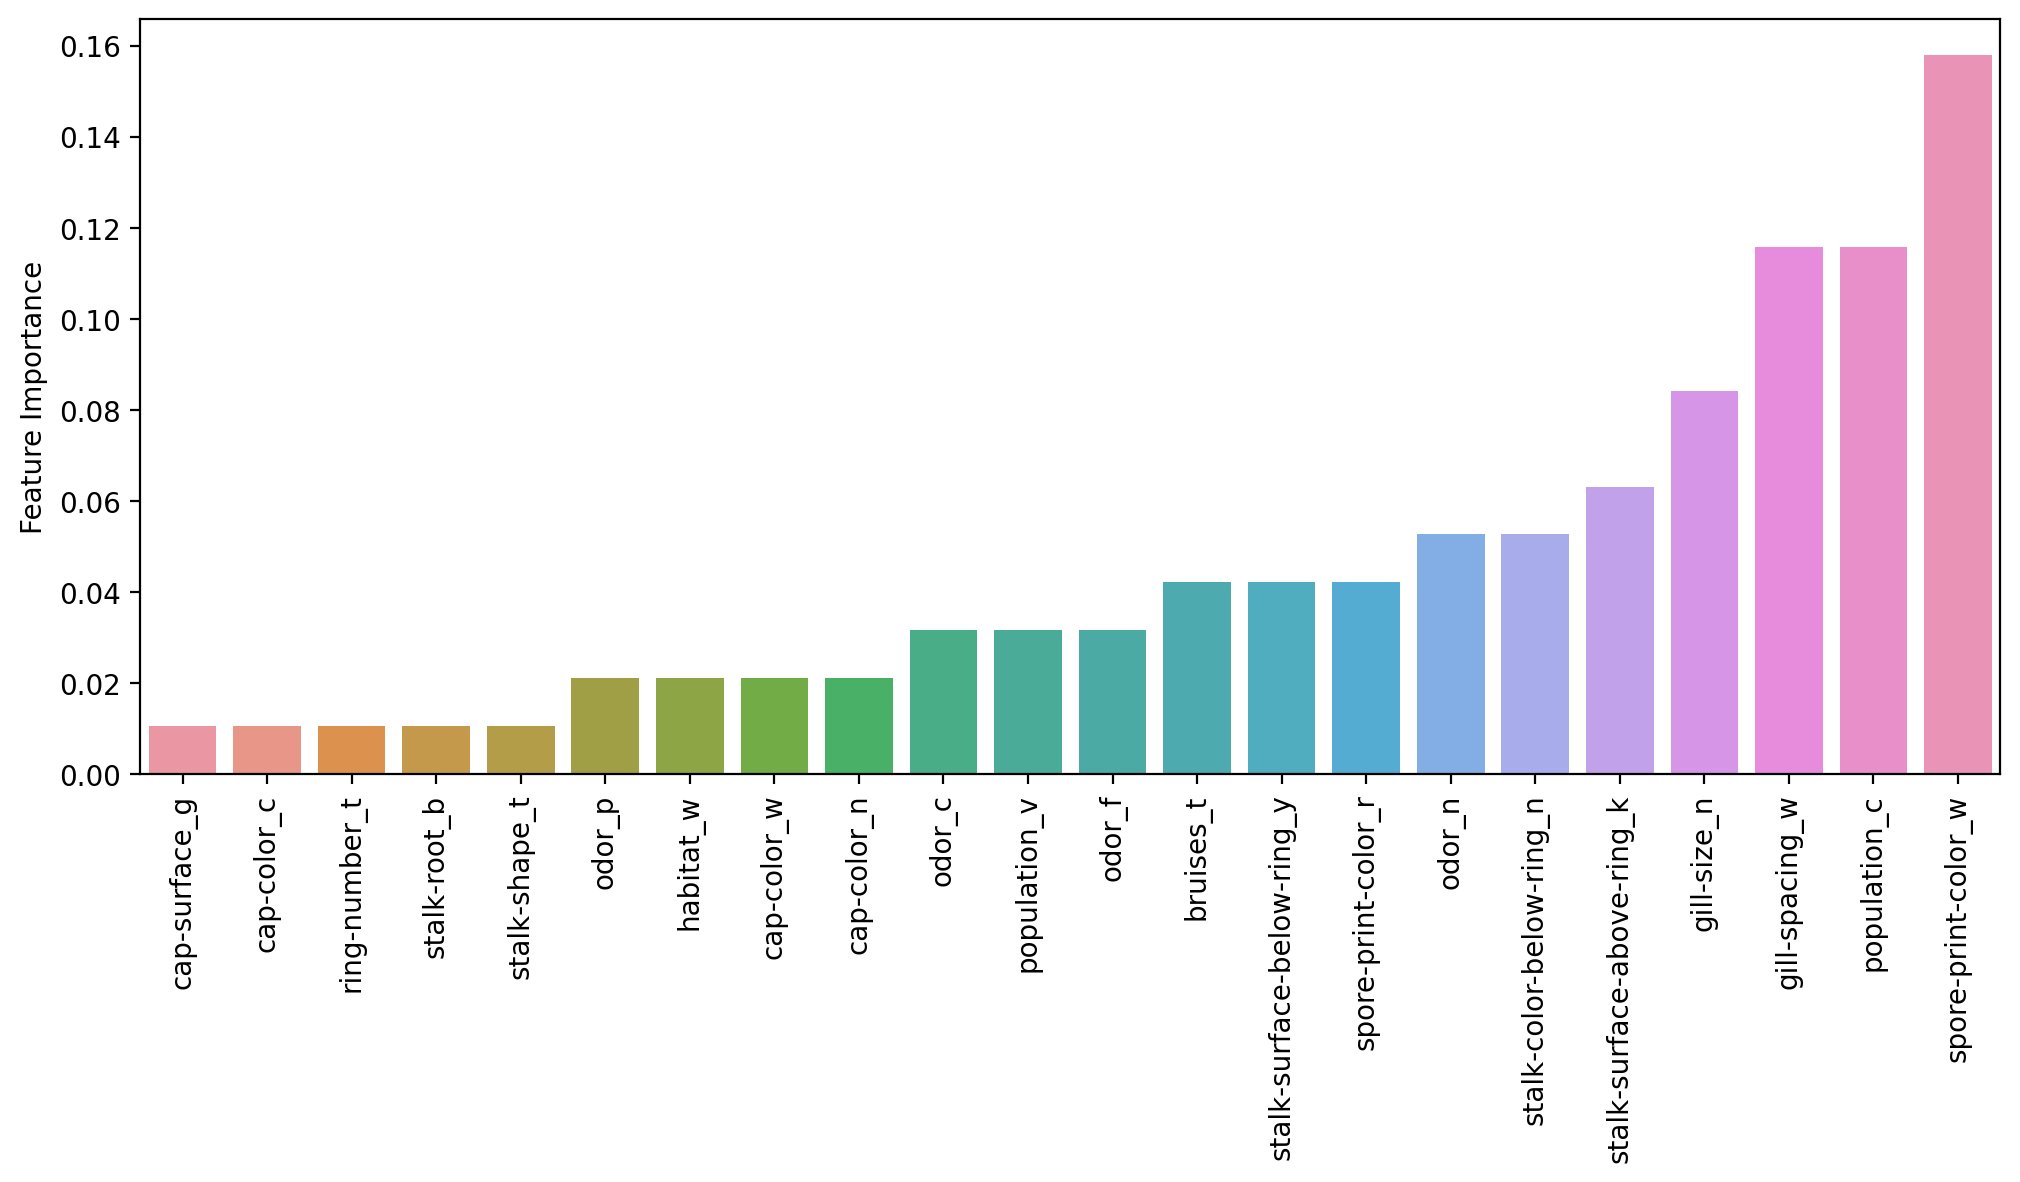

In [33]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(data=feature.sort_values('Feature Importance'),x=feature.sort_values('Feature Importance').index,y= 'Feature Importance')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

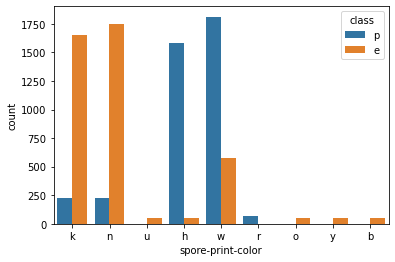

In [34]:
sns.countplot(data=df,x='spore-print-color',hue='class')

# Gradient Boosting and GridSearch

In [35]:
param_grid= {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [36]:
model2= GradientBoostingClassifier()

In [37]:
grid= GridSearchCV(model2,param_grid=param_grid)

# Fit to Training Data with CV Search

In [38]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [39]:
y_pred2= grid.predict(X_test)

In [40]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 40}

In [41]:
grid.best_score_

0.9996485061511423

# Performance

In [42]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [43]:
grid.best_estimator_.feature_importances_

array([ 0.00000000e+00,  7.59808540e-17,  0.00000000e+00,  0.00000000e+00,
        3.40661955e-18,  1.51120165e-03,  7.20728838e-18,  1.02505260e-16,
        0.00000000e+00,  0.00000000e+00,  2.70028536e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.46528729e-16,
        4.25847162e-03,  4.66494994e-02,  4.24021019e-05,  8.35689938e-03,
        2.04344574e-02,  7.93663197e-05,  6.25922262e-01,  5.23735181e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.44758706e-02,
        8.85582762e-03,  0.00000000e+00,  7.26142921e-16,  2.63031614e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.00606467e-16,  0.00000000e+00,  3.47963490e-17,  0.00000000e+00,
        3.24311122e-04,  0.00000000e+00,  1.42804250e-01,  0.00000000e+00,
        1.41239312e-02,  3.56862107e-04,  5.37662944e-03,  0.00000000e+00,
       -8.67246230e-18,  1.95471030e-03,  4.55213080e-02,  0.00000000e+00,
        0.00000000e+00,  

In [44]:
imp_feats = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,0.000000e+00
cap-shape_f,7.598085e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,3.406620e-18
...,...
habitat_l,2.574745e-04
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,1.946771e-21


In [45]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,6.259223e-01
stalk-root_c,1.428043e-01
bruises_t,4.664950e-02
stalk-surface-below-ring_y,4.552131e-02
spore-print-color_r,2.938490e-02
...,...
stalk-color-above-ring_p,0.000000e+00
stalk-color-above-ring_y,0.000000e+00
stalk-color-below-ring_e,0.000000e+00
habitat_w,0.000000e+00


In [46]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

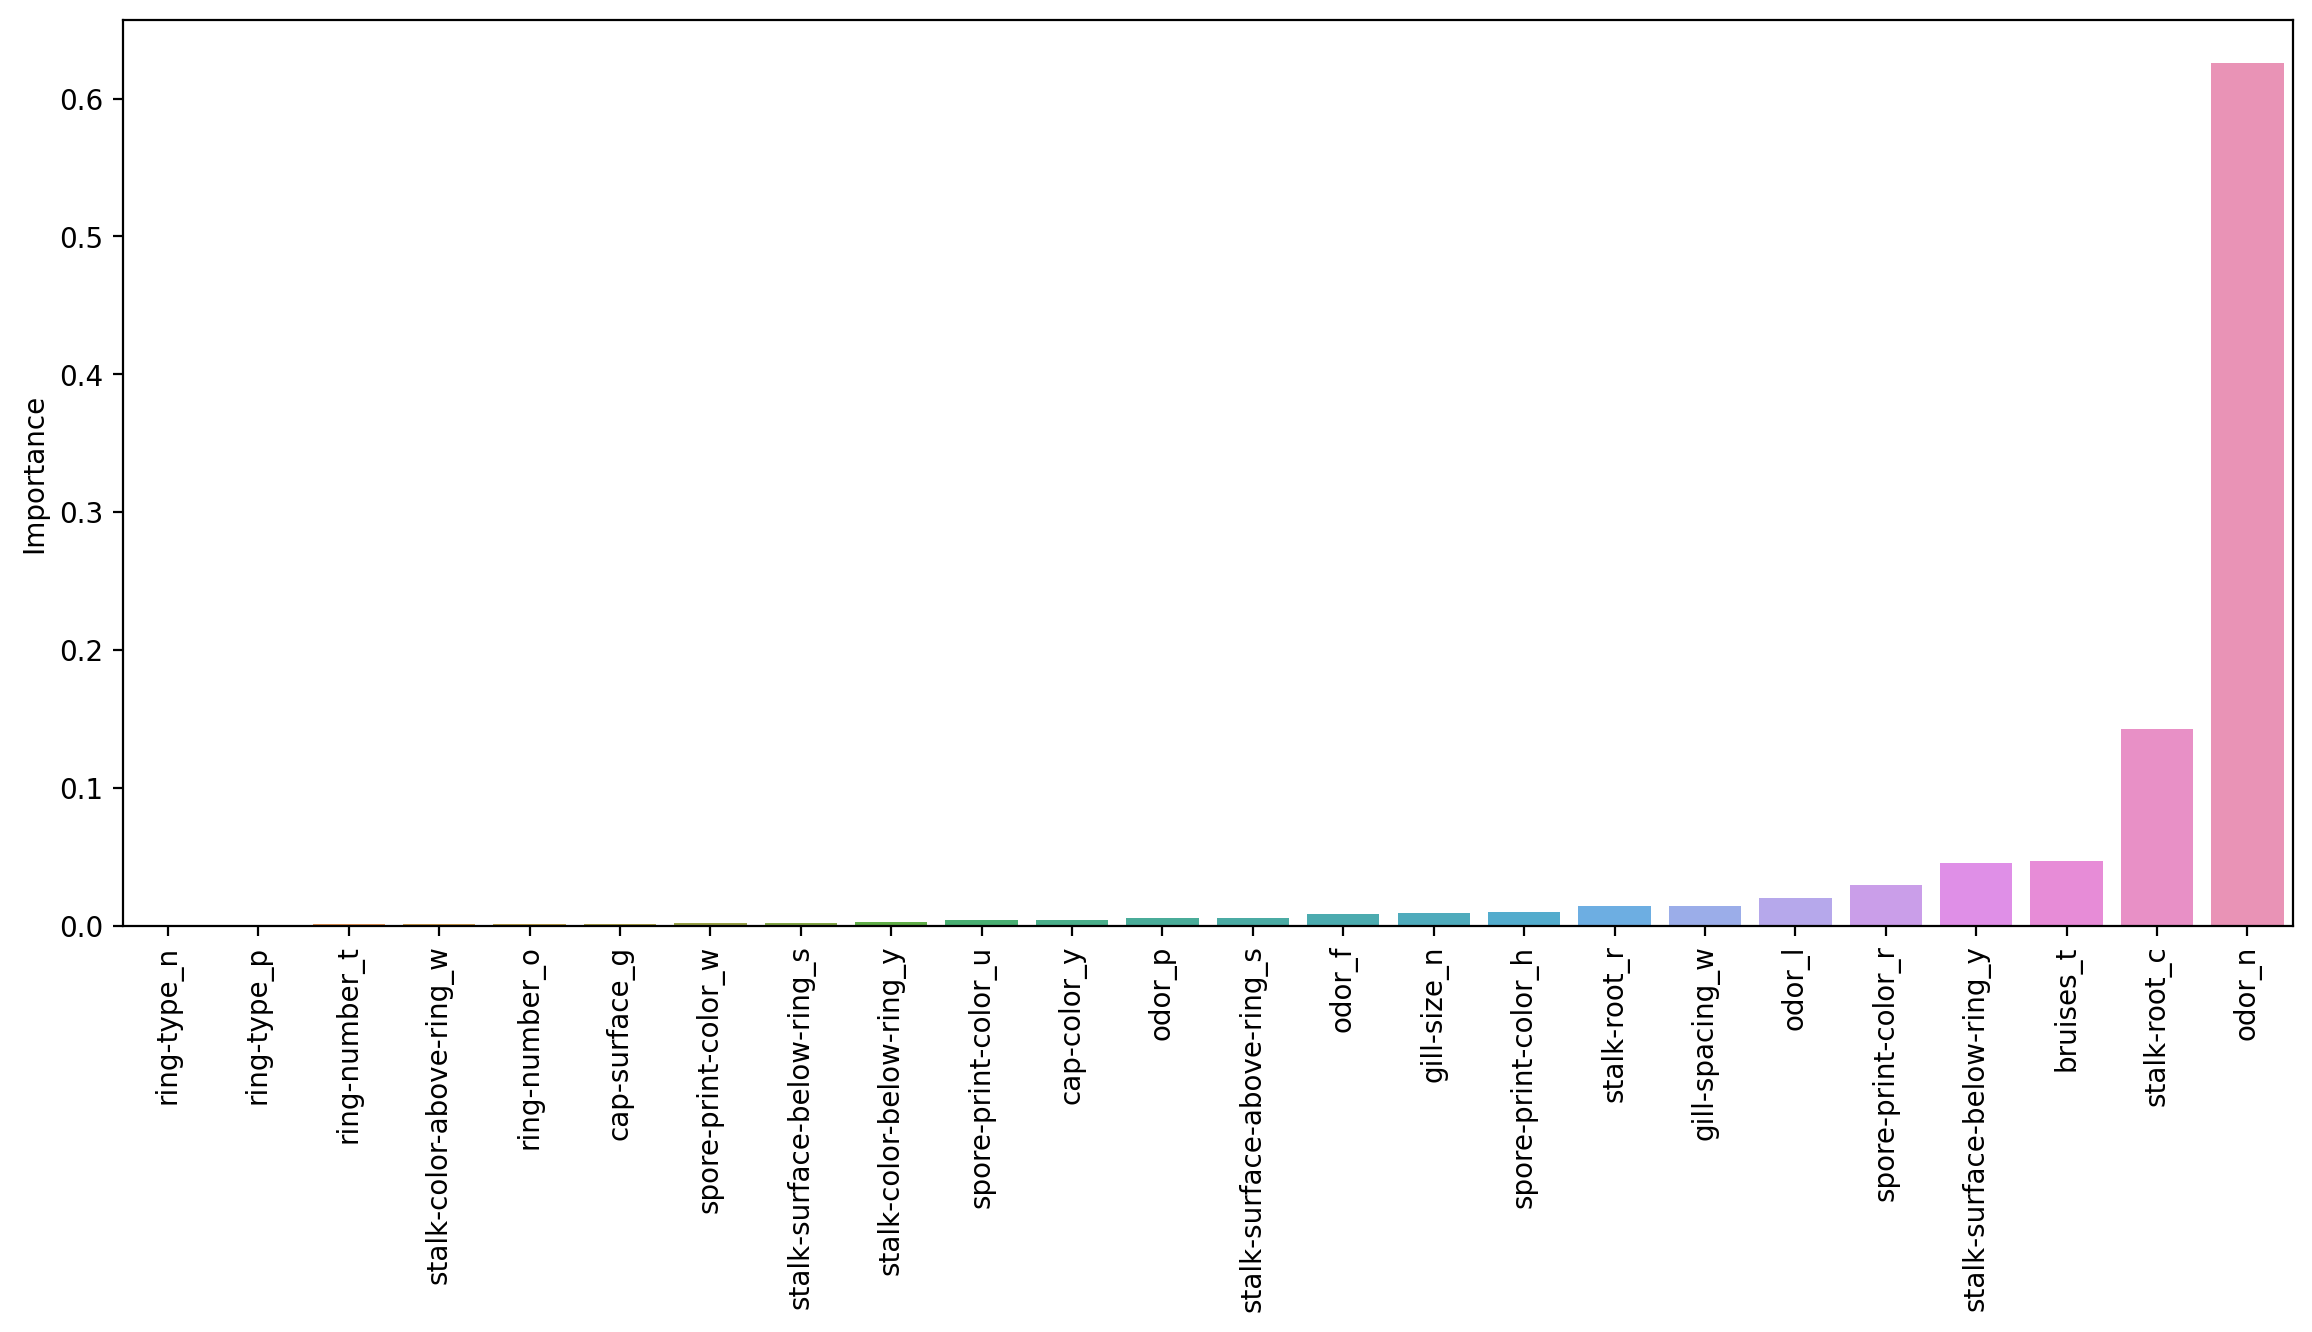

In [47]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

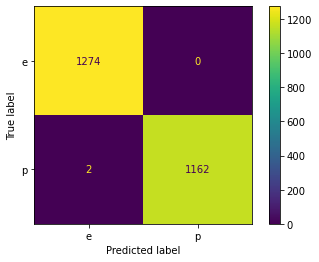

In [48]:
plot_confusion_matrix(grid,X_test,y_test)

# XGBoost

In [49]:
model3= XGBClassifier()

In [50]:
model3.fit(X_train,y_train)

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred3= model3.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [53]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [54]:
model3.feature_importances_

array([0.00000000e+00, 8.80857988e-06, 0.00000000e+00, 0.00000000e+00,
       3.68336114e-05, 0.00000000e+00, 6.64211839e-05, 3.62690503e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.85353139e-03,
       0.00000000e+00, 2.36021262e-02, 0.00000000e+00, 1.47450985e-02,
       5.31506091e-02, 0.00000000e+00, 2.13595182e-01, 2.58880239e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.12106223e-02,
       2.47837836e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.41500708e-04, 0.00000000e+00,
       2.45888776e-04, 2.83357600e-04, 2.88254410e-01, 2.72194797e-04,
       1.85644880e-01, 8.63105990e-04, 1.87173486e-04, 0.00000000e+00,
       0.00000000e+00, 2.38507819e-05, 2.26545911e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
imp_feats = pd.DataFrame(index=X.columns,data=model3.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000009
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000037
...,...
habitat_l,0.000542
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [56]:
imp_feats= imp_feats[imp_feats['Importance']>0]

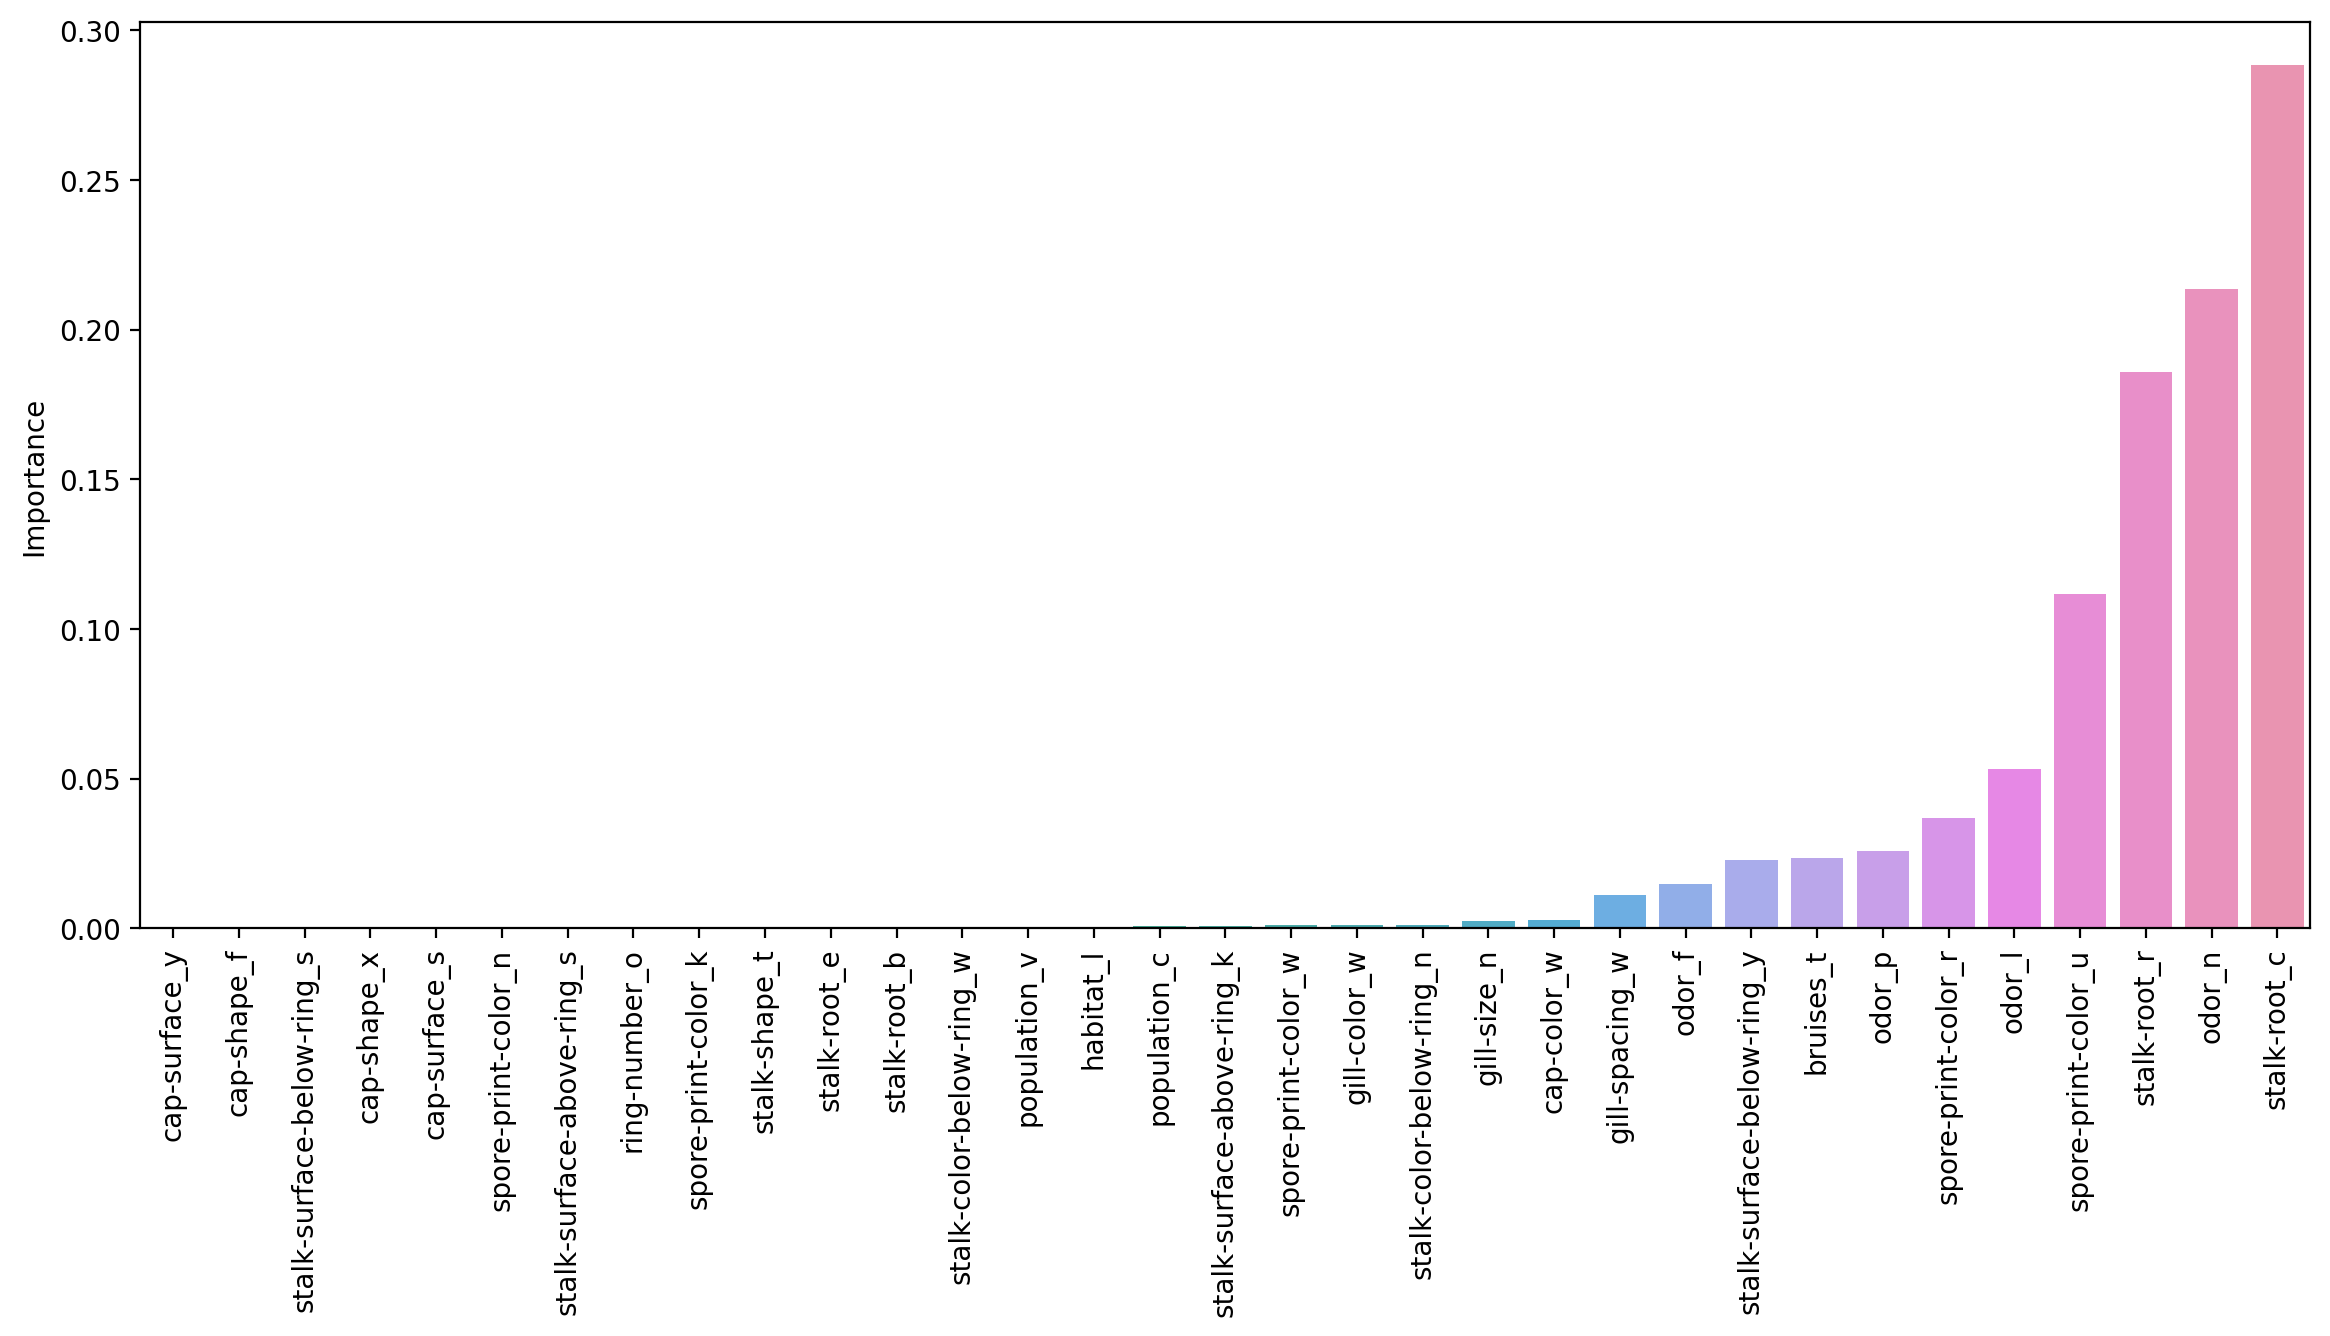

In [57]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

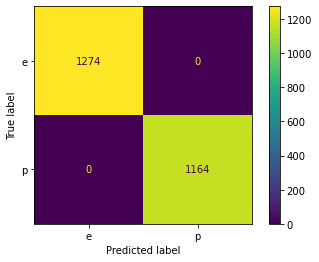

In [58]:
plot_confusion_matrix(model3,X_test,y_test)

# CatBoostClassifier

In [59]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [60]:
X= df.drop('class',axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [61]:
X= pd.get_dummies(X,drop_first=True)

In [62]:
y= df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [64]:
from catboost import CatBoostClassifier
model4=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model4.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
model4.score(X_test,y_test)

C:\Users\rahul\AppData\Local\Temp/ipykernel_15436/1705781473.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(df.dtypes != np.float)[0]


Learning rate set to 0.04868
0:	learn: 0.5394351	test: 0.5397348	best: 0.5397348 (0)	total: 185ms	remaining: 3m 4s
1:	learn: 0.4345367	test: 0.4349327	best: 0.4349327 (1)	total: 195ms	remaining: 1m 37s
2:	learn: 0.3685542	test: 0.3695768	best: 0.3695768 (2)	total: 203ms	remaining: 1m 7s
3:	learn: 0.2978247	test: 0.2984665	best: 0.2984665 (3)	total: 209ms	remaining: 52.1s
4:	learn: 0.2411454	test: 0.2417813	best: 0.2417813 (4)	total: 216ms	remaining: 42.9s
5:	learn: 0.1987872	test: 0.1997855	best: 0.1997855 (5)	total: 222ms	remaining: 36.7s
6:	learn: 0.1588716	test: 0.1604954	best: 0.1604954 (6)	total: 227ms	remaining: 32.1s
7:	learn: 0.1380267	test: 0.1391662	best: 0.1391662 (7)	total: 231ms	remaining: 28.6s
8:	learn: 0.1154804	test: 0.1168242	best: 0.1168242 (8)	total: 235ms	remaining: 25.9s
9:	learn: 0.1003742	test: 0.1014268	best: 0.1014268 (9)	total: 238ms	remaining: 23.6s
10:	learn: 0.0842943	test: 0.0851970	best: 0.0851970 (10)	total: 242ms	remaining: 21.8s
11:	learn: 0.0726226	t

1.0

In [65]:
y_pred4= model4.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



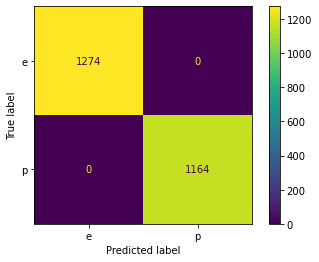

In [67]:
plot_confusion_matrix(model4,X_test,y_test)